The purpose of this notebook is to understand how LDA and NMF matrix factorizations were applied to extract evolutionary tumour dynamics from files generated by cancer cell fraction (CCF) callers that were tested in the first phase of the team project, as the original authors of this part of the project were unavailable to comment and did not include such information in the report

In [189]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

from IPython.display import display

In [190]:
SUBCLONAL_STRUCTURE_PATH = "../data/phase_two/subclonal_structure/"
INPUT_FILE_PATTERN = "Subclonal_structure_500_{index}.tsv"
NUM_CCF_BANDS = 20

In [191]:
def populate_ccf_band_vector(subclonal_structure_df, band_vector=np.zeros((10,1))):   
    for cluster in subclonal_structure_df.itertuples():
        for i, ccf_band in enumerate(np.linspace(0, 1, num=band_vector.shape[0], 
                                                   endpoint=False)[::-1]):
            if cluster.proportion > ccf_band:
                band_vector[i] = cluster.n_ssms
                break
                
    # Asserting that the sum of non-zero entries in the proportion band vector is equal
    # to the the number of simple somatic mutation clusters: in other words, ensuring that
    # there is no overlap of SSMs in the resulting band vector and hence no loss of cluster data
    #assert np.sum(band_vector > 0) == subclonal_structure_df.shape[0], display(subclonal_structure_df, band_vector[::-1])

    return band_vector[::-1]

In [192]:
def populate_ccf_band_matrix(input_paths, n_ccf_bands=10, input_file_delim="\t",
                             dtypes=dict(cluster=int, n_ssms=int, proportion=np.float64)):
    ccf_matrix = None
    for file_path in input_paths:
        sample_df = pd.read_csv(file_path, delimiter=input_file_delim, dtype=dtypes)
        ccf_vector = populate_ccf_band_vector(sample_df, 
                                              band_vector=np.zeros((n_ccf_bands, 1)))
        ccf_matrix = np.hstack((ccf_matrix, ccf_vector)) if ccf_matrix is not None else ccf_vector
    return ccf_matrix
    

In [201]:
def createSamplesMatrix(ds, samples, fn):
    n_ssms = ds['n_ssms']
    ccf = ds['proportion']
    for ccf_row in np.arange(0, ccf.shape[0]):
        for ccf_band, samples_row in zip(np.arange(0, 1, 0.1), np.arange(0, 10)):
            if ccf_band < ccf.iloc[ccf_row] <= ccf_band+0.1:
                samples[samples_row, fn] = n_ssms.iloc[ccf_row]

In [207]:
samples = np.zeros((10, 500), dtype=np.int32)
input_folder = Path(SUBCLONAL_STRUCTURE_PATH)

for i, path in enumerate(input_folder.iterdir()):
    print(path)
    dataset = pd.read_csv(path, delimiter='\t', encoding='utf-8')
    createSamplesMatrix(dataset, samples, i)
    
samples.shape

../data/phase_two/subclonal_structure/Sim_500_20.tsv
../data/phase_two/subclonal_structure/Sim_500_339.tsv
../data/phase_two/subclonal_structure/Sim_500_454.tsv
../data/phase_two/subclonal_structure/Sim_500_133.tsv
../data/phase_two/subclonal_structure/Sim_500_277.tsv
../data/phase_two/subclonal_structure/Sim_500_446.tsv
../data/phase_two/subclonal_structure/Sim_500_143.tsv
../data/phase_two/subclonal_structure/Sim_500_343.tsv
../data/phase_two/subclonal_structure/Sim_500_490.tsv
../data/phase_two/subclonal_structure/Sim_500_137.tsv
../data/phase_two/subclonal_structure/Sim_500_323.tsv
../data/phase_two/subclonal_structure/Sim_500_405.tsv
../data/phase_two/subclonal_structure/Sim_500_177.tsv
../data/phase_two/subclonal_structure/Sim_500_370.tsv
../data/phase_two/subclonal_structure/Sim_500_28.tsv
../data/phase_two/subclonal_structure/Sim_500_132.tsv
../data/phase_two/subclonal_structure/Sim_500_223.tsv
../data/phase_two/subclonal_structure/Sim_500_30.tsv
../data/phase_two/subclonal_str

../data/phase_two/subclonal_structure/Sim_500_71.tsv
../data/phase_two/subclonal_structure/Sim_500_348.tsv
../data/phase_two/subclonal_structure/Sim_500_456.tsv
../data/phase_two/subclonal_structure/Sim_500_274.tsv
../data/phase_two/subclonal_structure/Sim_500_45.tsv
../data/phase_two/subclonal_structure/Sim_500_259.tsv
../data/phase_two/subclonal_structure/Sim_500_228.tsv
../data/phase_two/subclonal_structure/Sim_500_197.tsv
../data/phase_two/subclonal_structure/Sim_500_140.tsv
../data/phase_two/subclonal_structure/Sim_500_389.tsv
../data/phase_two/subclonal_structure/Sim_500_403.tsv
../data/phase_two/subclonal_structure/Sim_500_242.tsv
../data/phase_two/subclonal_structure/Sim_500_73.tsv
../data/phase_two/subclonal_structure/Sim_500_5.tsv
../data/phase_two/subclonal_structure/Sim_500_273.tsv
../data/phase_two/subclonal_structure/Sim_500_141.tsv
../data/phase_two/subclonal_structure/Sim_500_83.tsv
../data/phase_two/subclonal_structure/Sim_500_287.tsv
../data/phase_two/subclonal_struct

../data/phase_two/subclonal_structure/Sim_500_338.tsv
../data/phase_two/subclonal_structure/Sim_500_156.tsv
../data/phase_two/subclonal_structure/Sim_500_65.tsv
../data/phase_two/subclonal_structure/Sim_500_116.tsv
../data/phase_two/subclonal_structure/Sim_500_450.tsv
../data/phase_two/subclonal_structure/Sim_500_182.tsv
../data/phase_two/subclonal_structure/Sim_500_421.tsv
../data/phase_two/subclonal_structure/Sim_500_153.tsv
../data/phase_two/subclonal_structure/Sim_500_438.tsv
../data/phase_two/subclonal_structure/Sim_500_445.tsv
../data/phase_two/subclonal_structure/Sim_500_392.tsv
../data/phase_two/subclonal_structure/Sim_500_97.tsv
../data/phase_two/subclonal_structure/Sim_500_481.tsv
../data/phase_two/subclonal_structure/Sim_500_215.tsv
../data/phase_two/subclonal_structure/Sim_500_413.tsv
../data/phase_two/subclonal_structure/Sim_500_36.tsv
../data/phase_two/subclonal_structure/Sim_500_56.tsv
../data/phase_two/subclonal_structure/Sim_500_88.tsv
../data/phase_two/subclonal_struc

(10, 500)

In [193]:
input_folder = Path(SUBCLONAL_STRUCTURE_PATH)

ccf_matrix = populate_ccf_band_matrix(input_folder.iterdir(), n_ccf_bands=NUM_CCF_BANDS)

In [194]:
ccf_matrix.shape

(20, 500)

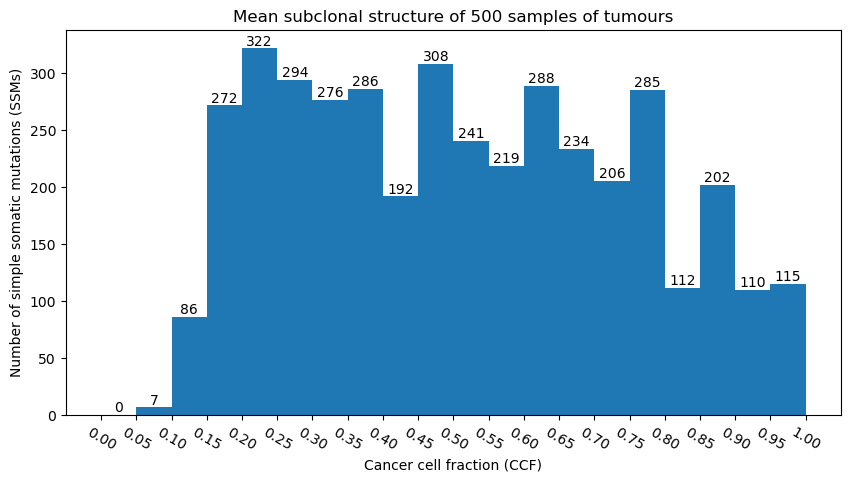

In [195]:
# Setting up data to be plotted
mean_ccf = np.mean(ccf_matrix, axis=1)
ccf_bands = np.linspace(0, 1, num=NUM_CCF_BANDS, endpoint=False)

# Setting up the plot
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(ccf_bands, mean_ccf, width=1/NUM_CCF_BANDS, align="edge")

# Configuring x-axis ticks and labels
xticks = list(ccf_bands) + [1]
xtick_labels = ["{:1.2f}".format(tick) for tick in xticks]
ax.set_xticks(xticks, labels=xtick_labels, rotation=-30)

# Configuring y-axis labels and limits
ax.bar_label(bars, fmt="{:.0f}")
# ax.set_ylim(0, 360)

# Setting up axis labels and titles
ax.set_xlabel("Cancer cell fraction (CCF)")
ax.set_ylabel("Number of simple somatic mutations (SSMs)")
ax.set_title("Mean subclonal structure of 500 samples of tumours")

plt.show()

In [196]:
lda = LatentDirichletAllocation()

In [197]:
param_grid = [
    {
        "learning_decay": [0.0],
        "batch_size": [500],
        "n_components": [2,3,4,5,6,7,8],
        "max_iter": [3,4,5,6,7,8,9]
    },
    {
        'n_components': [5, 6, 7, 8, 9], 
        'learning_decay': [0.5,0.6,0.7,0.8,0.9],
        'max_iter': [3,4, 5, 6, 7, 8, 9]
    }
]


In [198]:
gs = GridSearchCV(lda, param_grid=param_grid, n_jobs=-1, verbose=10)
gs.fit(ccf_matrix.T)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
[CV 3/5; 1/224] START batch_size=500, learning_decay=0.0, max_iter=3, n_components=2
[CV 3/5; 1/224] END batch_size=500, learning_decay=0.0, max_iter=3, n_components=2;, score=-1056545.140 total time=   0.4s
[CV 2/5; 2/224] START batch_size=500, learning_decay=0.0, max_iter=3, n_components=3
[CV 2/5; 2/224] END batch_size=500, learning_decay=0.0, max_iter=3, n_components=3;, score=-948625.072 total time=   0.4s
[CV 1/5; 3/224] START batch_size=500, learning_decay=0.0, max_iter=3, n_components=4
[CV 1/5; 3/224] END batch_size=500, learning_decay=0.0, max_iter=3, n_components=4;, score=-891331.977 total time=   0.4s
[CV 5/5; 3/224] START batch_size=500, learning_decay=0.0, max_iter=3, n_components=4
[CV 5/5; 3/224] END batch_size=500, learning_decay=0.0, max_iter=3, n_components=4;, score=-901288.285 total time=   0.4s
[CV 4/5; 4/224] START batch_size=500, learning_decay=0.0, max_iter=3, n_components=5
[CV 4/5; 4/224] END ba

[CV 4/5; 1/224] START batch_size=500, learning_decay=0.0, max_iter=3, n_components=2
[CV 4/5; 1/224] END batch_size=500, learning_decay=0.0, max_iter=3, n_components=2;, score=-961708.623 total time=   0.4s
[CV 3/5; 2/224] START batch_size=500, learning_decay=0.0, max_iter=3, n_components=3
[CV 3/5; 2/224] END batch_size=500, learning_decay=0.0, max_iter=3, n_components=3;, score=-934179.341 total time=   0.5s
[CV 2/5; 3/224] START batch_size=500, learning_decay=0.0, max_iter=3, n_components=4
[CV 2/5; 3/224] END batch_size=500, learning_decay=0.0, max_iter=3, n_components=4;, score=-822473.220 total time=   0.4s
[CV 1/5; 4/224] START batch_size=500, learning_decay=0.0, max_iter=3, n_components=5
[CV 1/5; 4/224] END batch_size=500, learning_decay=0.0, max_iter=3, n_components=5;, score=-836529.710 total time=   0.4s
[CV 1/5; 5/224] START batch_size=500, learning_decay=0.0, max_iter=3, n_components=6
[CV 1/5; 5/224] END batch_size=500, learning_decay=0.0, max_iter=3, n_components=6;, sc

[CV 2/5; 32/224] START batch_size=500, learning_decay=0.0, max_iter=7, n_components=5
[CV 2/5; 32/224] END batch_size=500, learning_decay=0.0, max_iter=7, n_components=5;, score=-775179.764 total time=   0.6s
[CV 1/5; 33/224] START batch_size=500, learning_decay=0.0, max_iter=7, n_components=6
[CV 1/5; 33/224] END batch_size=500, learning_decay=0.0, max_iter=7, n_components=6;, score=-740667.241 total time=   0.6s
[CV 5/5; 33/224] START batch_size=500, learning_decay=0.0, max_iter=7, n_components=6
[CV 5/5; 33/224] END batch_size=500, learning_decay=0.0, max_iter=7, n_components=6;, score=-747505.328 total time=   0.6s
[CV 4/5; 34/224] START batch_size=500, learning_decay=0.0, max_iter=7, n_components=7
[CV 4/5; 34/224] END batch_size=500, learning_decay=0.0, max_iter=7, n_components=7;, score=-629819.424 total time=   0.6s
[CV 3/5; 35/224] START batch_size=500, learning_decay=0.0, max_iter=7, n_components=8
[CV 3/5; 35/224] END batch_size=500, learning_decay=0.0, max_iter=7, n_compone

[CV 5/5; 32/224] START batch_size=500, learning_decay=0.0, max_iter=7, n_components=5
[CV 5/5; 32/224] END batch_size=500, learning_decay=0.0, max_iter=7, n_components=5;, score=-808135.703 total time=   0.5s
[CV 4/5; 33/224] START batch_size=500, learning_decay=0.0, max_iter=7, n_components=6
[CV 4/5; 33/224] END batch_size=500, learning_decay=0.0, max_iter=7, n_components=6;, score=-679174.440 total time=   0.5s
[CV 3/5; 34/224] START batch_size=500, learning_decay=0.0, max_iter=7, n_components=7
[CV 3/5; 34/224] END batch_size=500, learning_decay=0.0, max_iter=7, n_components=7;, score=-658658.888 total time=   0.5s
[CV 1/5; 35/224] START batch_size=500, learning_decay=0.0, max_iter=7, n_components=8
[CV 1/5; 35/224] END batch_size=500, learning_decay=0.0, max_iter=7, n_components=8;, score=-603858.146 total time=   0.5s
[CV 5/5; 35/224] START batch_size=500, learning_decay=0.0, max_iter=7, n_components=8
[CV 5/5; 35/224] END batch_size=500, learning_decay=0.0, max_iter=7, n_compone

[CV 5/5; 63/224] END learning_decay=0.5, max_iter=5, n_components=8;, score=-657094.001 total time=   0.5s
[CV 5/5; 64/224] START learning_decay=0.5, max_iter=5, n_components=9...........
[CV 5/5; 64/224] END learning_decay=0.5, max_iter=5, n_components=9;, score=-618318.385 total time=   0.5s
[CV 4/5; 65/224] START learning_decay=0.5, max_iter=6, n_components=5...........
[CV 4/5; 65/224] END learning_decay=0.5, max_iter=6, n_components=5;, score=-735723.894 total time=   0.5s
[CV 2/5; 66/224] START learning_decay=0.5, max_iter=6, n_components=6...........
[CV 2/5; 66/224] END learning_decay=0.5, max_iter=6, n_components=6;, score=-707894.304 total time=   0.5s
[CV 5/5; 66/224] START learning_decay=0.5, max_iter=6, n_components=6...........
[CV 5/5; 66/224] END learning_decay=0.5, max_iter=6, n_components=6;, score=-752469.714 total time=   0.6s
[CV 5/5; 67/224] START learning_decay=0.5, max_iter=6, n_components=7...........
[CV 5/5; 67/224] END learning_decay=0.5, max_iter=6, n_compo

[CV 1/5; 65/224] START learning_decay=0.5, max_iter=6, n_components=5...........
[CV 1/5; 65/224] END learning_decay=0.5, max_iter=6, n_components=5;, score=-789447.225 total time=   0.6s
[CV 5/5; 65/224] START learning_decay=0.5, max_iter=6, n_components=5...........
[CV 5/5; 65/224] END learning_decay=0.5, max_iter=6, n_components=5;, score=-801322.635 total time=   0.5s
[CV 1/5; 67/224] START learning_decay=0.5, max_iter=6, n_components=7...........
[CV 1/5; 67/224] END learning_decay=0.5, max_iter=6, n_components=7;, score=-677233.121 total time=   0.5s
[CV 4/5; 67/224] START learning_decay=0.5, max_iter=6, n_components=7...........
[CV 4/5; 67/224] END learning_decay=0.5, max_iter=6, n_components=7;, score=-633780.373 total time=   0.5s
[CV 3/5; 68/224] START learning_decay=0.5, max_iter=6, n_components=8...........
[CV 3/5; 68/224] END learning_decay=0.5, max_iter=6, n_components=8;, score=-616492.809 total time=   0.5s
[CV 2/5; 69/224] START learning_decay=0.5, max_iter=6, n_com

[CV 4/5; 97/224] START learning_decay=0.6, max_iter=5, n_components=7...........
[CV 4/5; 97/224] END learning_decay=0.6, max_iter=5, n_components=7;, score=-626786.126 total time=   0.4s
[CV 2/5; 98/224] START learning_decay=0.6, max_iter=5, n_components=8...........
[CV 2/5; 98/224] END learning_decay=0.6, max_iter=5, n_components=8;, score=-592640.955 total time=   0.4s
[CV 1/5; 99/224] START learning_decay=0.6, max_iter=5, n_components=9...........
[CV 1/5; 99/224] END learning_decay=0.6, max_iter=5, n_components=9;, score=-609825.560 total time=   0.5s
[CV 5/5; 99/224] START learning_decay=0.6, max_iter=5, n_components=9...........
[CV 5/5; 99/224] END learning_decay=0.6, max_iter=5, n_components=9;, score=-611743.841 total time=   0.5s
[CV 4/5; 100/224] START learning_decay=0.6, max_iter=6, n_components=5..........
[CV 4/5; 100/224] END learning_decay=0.6, max_iter=6, n_components=5;, score=-748793.550 total time=   0.6s
[CV 3/5; 101/224] START learning_decay=0.6, max_iter=6, n_c

[CV 5/5; 100/224] END learning_decay=0.6, max_iter=6, n_components=5;, score=-815408.470 total time=   0.6s
[CV 4/5; 101/224] START learning_decay=0.6, max_iter=6, n_components=6..........
[CV 4/5; 101/224] END learning_decay=0.6, max_iter=6, n_components=6;, score=-652383.545 total time=   0.6s
[CV 4/5; 102/224] START learning_decay=0.6, max_iter=6, n_components=7..........
[CV 4/5; 102/224] END learning_decay=0.6, max_iter=6, n_components=7;, score=-624538.173 total time=   0.6s
[CV 3/5; 103/224] START learning_decay=0.6, max_iter=6, n_components=8..........
[CV 3/5; 103/224] END learning_decay=0.6, max_iter=6, n_components=8;, score=-602523.310 total time=   0.5s
[CV 2/5; 104/224] START learning_decay=0.6, max_iter=6, n_components=9..........
[CV 2/5; 104/224] END learning_decay=0.6, max_iter=6, n_components=9;, score=-557552.220 total time=   0.6s
[CV 1/5; 105/224] START learning_decay=0.6, max_iter=7, n_components=5..........
[CV 1/5; 105/224] END learning_decay=0.6, max_iter=7, n

[CV 3/5; 131/224] START learning_decay=0.7, max_iter=5, n_components=6..........
[CV 3/5; 131/224] END learning_decay=0.7, max_iter=5, n_components=6;, score=-734530.577 total time=   0.5s
[CV 2/5; 132/224] START learning_decay=0.7, max_iter=5, n_components=7..........
[CV 2/5; 132/224] END learning_decay=0.7, max_iter=5, n_components=7;, score=-650195.906 total time=   0.5s
[CV 1/5; 133/224] START learning_decay=0.7, max_iter=5, n_components=8..........
[CV 1/5; 133/224] END learning_decay=0.7, max_iter=5, n_components=8;, score=-607872.087 total time=   0.4s
[CV 4/5; 133/224] START learning_decay=0.7, max_iter=5, n_components=8..........
[CV 4/5; 133/224] END learning_decay=0.7, max_iter=5, n_components=8;, score=-587897.130 total time=   0.5s
[CV 4/5; 134/224] START learning_decay=0.7, max_iter=5, n_components=9..........
[CV 4/5; 134/224] END learning_decay=0.7, max_iter=5, n_components=9;, score=-549310.924 total time=   0.5s
[CV 2/5; 135/224] START learning_decay=0.7, max_iter=6,

[CV 2/5; 137/224] END learning_decay=0.7, max_iter=6, n_components=7;, score=-649519.394 total time=   0.5s
[CV 1/5; 138/224] START learning_decay=0.7, max_iter=6, n_components=8..........
[CV 1/5; 138/224] END learning_decay=0.7, max_iter=6, n_components=8;, score=-629936.145 total time=   0.7s
[CV 2/5; 139/224] START learning_decay=0.7, max_iter=6, n_components=9..........
[CV 2/5; 139/224] END learning_decay=0.7, max_iter=6, n_components=9;, score=-577473.519 total time=   0.5s
[CV 5/5; 139/224] START learning_decay=0.7, max_iter=6, n_components=9..........
[CV 5/5; 139/224] END learning_decay=0.7, max_iter=6, n_components=9;, score=-584483.256 total time=   0.5s
[CV 3/5; 140/224] START learning_decay=0.7, max_iter=7, n_components=5..........
[CV 3/5; 140/224] END learning_decay=0.7, max_iter=7, n_components=5;, score=-791250.945 total time=   0.5s
[CV 2/5; 141/224] START learning_decay=0.7, max_iter=7, n_components=6..........
[CV 2/5; 141/224] END learning_decay=0.7, max_iter=7, n

[CV 1/5; 166/224] START learning_decay=0.8, max_iter=5, n_components=6..........
[CV 1/5; 166/224] END learning_decay=0.8, max_iter=5, n_components=6;, score=-718333.163 total time=   0.5s
[CV 5/5; 166/224] START learning_decay=0.8, max_iter=5, n_components=6..........
[CV 5/5; 166/224] END learning_decay=0.8, max_iter=5, n_components=6;, score=-717757.355 total time=   0.6s
[CV 4/5; 167/224] START learning_decay=0.8, max_iter=5, n_components=7..........
[CV 4/5; 167/224] END learning_decay=0.8, max_iter=5, n_components=7;, score=-629767.215 total time=   0.5s
[CV 3/5; 168/224] START learning_decay=0.8, max_iter=5, n_components=8..........
[CV 3/5; 168/224] END learning_decay=0.8, max_iter=5, n_components=8;, score=-621228.991 total time=   0.5s
[CV 2/5; 169/224] START learning_decay=0.8, max_iter=5, n_components=9..........
[CV 2/5; 169/224] END learning_decay=0.8, max_iter=5, n_components=9;, score=-579247.749 total time=   0.6s
[CV 1/5; 170/224] START learning_decay=0.8, max_iter=6,

[CV 3/5; 170/224] END learning_decay=0.8, max_iter=6, n_components=5;, score=-760093.858 total time=   0.5s
[CV 1/5; 171/224] START learning_decay=0.8, max_iter=6, n_components=6..........
[CV 1/5; 171/224] END learning_decay=0.8, max_iter=6, n_components=6;, score=-742637.021 total time=   0.5s
[CV 5/5; 171/224] START learning_decay=0.8, max_iter=6, n_components=6..........
[CV 5/5; 171/224] END learning_decay=0.8, max_iter=6, n_components=6;, score=-733905.760 total time=   0.5s
[CV 4/5; 172/224] START learning_decay=0.8, max_iter=6, n_components=7..........
[CV 4/5; 172/224] END learning_decay=0.8, max_iter=6, n_components=7;, score=-617279.983 total time=   0.5s
[CV 3/5; 173/224] START learning_decay=0.8, max_iter=6, n_components=8..........
[CV 3/5; 173/224] END learning_decay=0.8, max_iter=6, n_components=8;, score=-626950.251 total time=   0.6s
[CV 3/5; 174/224] START learning_decay=0.8, max_iter=6, n_components=9..........
[CV 3/5; 174/224] END learning_decay=0.8, max_iter=6, n

GridSearchCV(estimator=LatentDirichletAllocation(), n_jobs=-1,
             param_grid=[{'batch_size': [500], 'learning_decay': [0.0],
                          'max_iter': [3, 4, 5, 6, 7, 8, 9],
                          'n_components': [2, 3, 4, 5, 6, 7, 8]},
                         {'learning_decay': [0.5, 0.6, 0.7, 0.8, 0.9],
                          'max_iter': [3, 4, 5, 6, 7, 8, 9],
                          'n_components': [5, 6, 7, 8, 9]}],
             verbose=10)

In [199]:
gs.best_estimator_

LatentDirichletAllocation(learning_decay=0.9, max_iter=9, n_components=9)

In [185]:
gs.best_params_

{'learning_decay': 0.7, 'max_iter': 4, 'n_components': 6}

In [200]:
gs.best_score_

-557099.4276529934

[CV 1/5; 200/224] START learning_decay=0.9, max_iter=5, n_components=5..........
[CV 1/5; 200/224] END learning_decay=0.9, max_iter=5, n_components=5;, score=-795963.501 total time=   0.5s
[CV 5/5; 200/224] START learning_decay=0.9, max_iter=5, n_components=5..........
[CV 5/5; 200/224] END learning_decay=0.9, max_iter=5, n_components=5;, score=-790269.585 total time=   0.5s
[CV 4/5; 201/224] START learning_decay=0.9, max_iter=5, n_components=6..........
[CV 4/5; 201/224] END learning_decay=0.9, max_iter=5, n_components=6;, score=-669358.734 total time=   0.6s
[CV 5/5; 202/224] START learning_decay=0.9, max_iter=5, n_components=7..........
[CV 5/5; 202/224] END learning_decay=0.9, max_iter=5, n_components=7;, score=-707833.326 total time=   0.5s
[CV 3/5; 203/224] START learning_decay=0.9, max_iter=5, n_components=8..........
[CV 3/5; 203/224] END learning_decay=0.9, max_iter=5, n_components=8;, score=-618471.689 total time=   0.5s
[CV 5/5; 203/224] START learning_decay=0.9, max_iter=5,

[CV 3/5; 204/224] END learning_decay=0.9, max_iter=5, n_components=9;, score=-591121.405 total time=   0.6s
[CV 2/5; 205/224] START learning_decay=0.9, max_iter=6, n_components=5..........
[CV 2/5; 205/224] END learning_decay=0.9, max_iter=6, n_components=5;, score=-801276.806 total time=   0.5s
[CV 4/5; 205/224] START learning_decay=0.9, max_iter=6, n_components=5..........
[CV 4/5; 205/224] END learning_decay=0.9, max_iter=6, n_components=5;, score=-744660.308 total time=   0.5s
[CV 3/5; 206/224] START learning_decay=0.9, max_iter=6, n_components=6..........
[CV 3/5; 206/224] END learning_decay=0.9, max_iter=6, n_components=6;, score=-728600.447 total time=   0.5s
[CV 2/5; 207/224] START learning_decay=0.9, max_iter=6, n_components=7..........
[CV 2/5; 207/224] END learning_decay=0.9, max_iter=6, n_components=7;, score=-694888.318 total time=   0.5s
[CV 1/5; 208/224] START learning_decay=0.9, max_iter=6, n_components=8..........
[CV 1/5; 208/224] END learning_decay=0.9, max_iter=6, n

In [187]:
gs.best_score_

-3314487.655789577

In [176]:
gs.cv_results_

{'mean_fit_time': array([0.03780499, 0.03069801, 0.02611427, 0.02793541, 0.02827077,
        0.02745194, 0.02820935, 0.03554006, 0.03012214, 0.03389406,
        0.03100653, 0.02771854, 0.02762799, 0.03023729, 0.03421879,
        0.03208542, 0.03523932, 0.03213739, 0.03046856, 0.03179851,
        0.03215222, 0.04009109, 0.03798232, 0.0363081 , 0.0336091 ,
        0.03367057, 0.03748994, 0.0337935 , 0.0275671 , 0.02883859,
        0.02678967, 0.02442217, 0.02763548, 0.03096046, 0.03226399,
        0.03370686, 0.02899785, 0.02637315, 0.03202786, 0.03667898,
        0.03501353, 0.03462052, 0.03355508, 0.03276358, 0.03526678,
        0.05088701, 0.03762412, 0.03906355, 0.02963543, 0.03176727,
        0.03262424, 0.03276901, 0.03115878, 0.03504963, 0.03174992,
        0.03274074, 0.02768121, 0.03136253, 0.03397627, 0.03461809,
        0.03405995, 0.0320519 , 0.03206639, 0.03532948, 0.03355794,
        0.03455663, 0.03336339, 0.03615522, 0.02961993, 0.02873826,
        0.02757277, 0.02716198,

In [103]:
len(data)

11314

In [165]:
gs.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_decay', 'param_max_iter', 'param_n_components', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [166]:
gs.cv_results_["params"]

[{'learning_decay': 0.5, 'max_iter': 6, 'n_components': 5},
 {'learning_decay': 0.5, 'max_iter': 6, 'n_components': 6},
 {'learning_decay': 0.5, 'max_iter': 6, 'n_components': 7},
 {'learning_decay': 0.5, 'max_iter': 6, 'n_components': 8},
 {'learning_decay': 0.5, 'max_iter': 6, 'n_components': 9},
 {'learning_decay': 0.5, 'max_iter': 7, 'n_components': 5},
 {'learning_decay': 0.5, 'max_iter': 7, 'n_components': 6},
 {'learning_decay': 0.5, 'max_iter': 7, 'n_components': 7},
 {'learning_decay': 0.5, 'max_iter': 7, 'n_components': 8},
 {'learning_decay': 0.5, 'max_iter': 7, 'n_components': 9},
 {'learning_decay': 0.5, 'max_iter': 8, 'n_components': 5},
 {'learning_decay': 0.5, 'max_iter': 8, 'n_components': 6},
 {'learning_decay': 0.5, 'max_iter': 8, 'n_components': 7},
 {'learning_decay': 0.5, 'max_iter': 8, 'n_components': 8},
 {'learning_decay': 0.5, 'max_iter': 8, 'n_components': 9},
 {'learning_decay': 0.5, 'max_iter': 9, 'n_components': 5},
 {'learning_decay': 0.5, 'max_iter': 9, 